In [5]:
from google.colab import files

uploaded = files.upload()


Saving AEP_hourly.csv to AEP_hourly.csv


# New Section

In [6]:
import pandas as pd
df=pd.read_csv('AEP_hourly.csv')

In [7]:
df.head()
df.size

242546

In [8]:
df.describe()

,AEP_MW
count,121273.000000
mean,15499.513717
std,2591.399065
min,9581.000000
25%,13630.000000
50%,15310.000000
75%,17200.000000
max,25695.000000


In [9]:
df.isnull().any()

Datetime    False
AEP_MW      False
dtype: bool

In [10]:
df['Datetime'] = df.Datetime.astype('Datetime64')
print(df.dtypes)
df.head()

Datetime    datetime64[ns]
AEP_MW             float64
dtype: object


,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0


In [11]:
df['Datetime']= pd.to_datetime(df['Datetime'])

df['Year'] = pd.DatetimeIndex(df['Datetime']).year

df['Month'] = pd.DatetimeIndex(df['Datetime']).month

df['Day'] = pd.DatetimeIndex(df['Datetime']).day

df['Time'] = pd.DatetimeIndex(df['Datetime']).time

df['Quarter']=pd.DatetimeIndex(df['Datetime']).quarter

df['Weekday']=pd.DatetimeIndex(df['Datetime']).weekday


df.head()


,Datetime,AEP_MW,Year,Month,Day,Time,Quarter,Weekday
0,2004-12-31 01:00:00,13478.0,2004,12,31,01:00:00,4,4
1,2004-12-31 02:00:00,12865.0,2004,12,31,02:00:00,4,4
2,2004-12-31 03:00:00,12577.0,2004,12,31,03:00:00,4,4
3,2004-12-31 04:00:00,12517.0,2004,12,31,04:00:00,4,4
4,2004-12-31 05:00:00,12670.0,2004,12,31,05:00:00,4,4


In [12]:
season_list = []
for quarter in df['Quarter']:
    if(quarter == 1):
      season_list.append("Winter")
    if(quarter == 2):
      season_list.append("Spring")
    if(quarter == 3):
      season_list.append("Summer")
    if(quarter == 4):
      season_list.append("Fall")       
df['Season'] = season_list

In [13]:
df.head()
df.size

1091457

In [14]:
Isweekday =[]
for day in df['Weekday']:
  if(day==5 or day==6):
    Isweekday.append("false")
  else:
    Isweekday.append("true")
df['Isweekday'] = Isweekday   


In [15]:

df[df['Isweekday']== "false"]

,Datetime,AEP_MW,Year,Month,Day,Time,Quarter,Weekday,Season,Isweekday
23,2005-01-01 00:00:00,12892.0,2005,1,1,00:00:00,1,5,Winter,false
120,2004-12-26 01:00:00,15059.0,2004,12,26,01:00:00,4,6,Fall,false
121,2004-12-26 02:00:00,14617.0,2004,12,26,02:00:00,4,6,Fall,false
122,2004-12-26 03:00:00,14452.0,2004,12,26,03:00:00,4,6,Fall,false
123,2004-12-26 04:00:00,14465.0,2004,12,26,04:00:00,4,6,Fall,false
...,...,...,...,...,...,...,...,...,...,...
121149,2018-01-06 21:00:00,21653.0,2018,1,6,21:00:00,1,5,Winter,false
121150,2018-01-06 22:00:00,21523.0,2018,1,6,22:00:00,1,5,Winter,false
121151,2018-01-06 23:00:00,21208.0,2018,1,6,23:00:00,1,5,Winter,false
121152,2018-01-07 00:00:00,20786.0,2018,1,7,00:00:00,1,6,Winter,false


In [16]:
df= df.drop(columns=['Weekday'])
df.head()

,Datetime,AEP_MW,Year,Month,Day,Time,Quarter,Season,Isweekday
0,2004-12-31 01:00:00,13478.0,2004,12,31,01:00:00,4,Fall,true
1,2004-12-31 02:00:00,12865.0,2004,12,31,02:00:00,4,Fall,true
2,2004-12-31 03:00:00,12577.0,2004,12,31,03:00:00,4,Fall,true
3,2004-12-31 04:00:00,12517.0,2004,12,31,04:00:00,4,Fall,true
4,2004-12-31 05:00:00,12670.0,2004,12,31,05:00:00,4,Fall,true


In [17]:
df.size

1091457

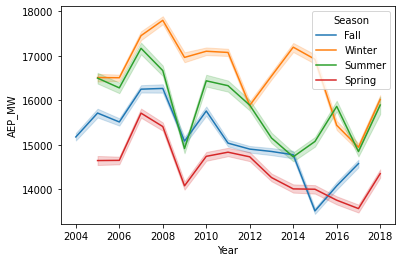

<Figure size 1440x1440 with 0 Axes>

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
ax=sns.lineplot(x='Year',y='AEP_MW',hue='Season',data=df)
plt.figure(figsize=(20,20))
plt.show()


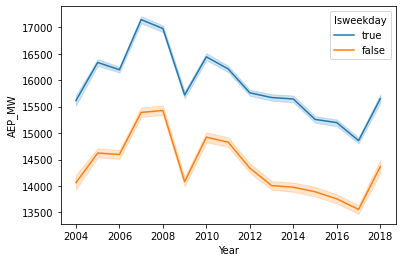

<Figure size 1440x1440 with 0 Axes>

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
ax=sns.lineplot(x='Year',y='AEP_MW',hue='Isweekday',data=df)
plt.figure(figsize=(20,20))
plt.show()


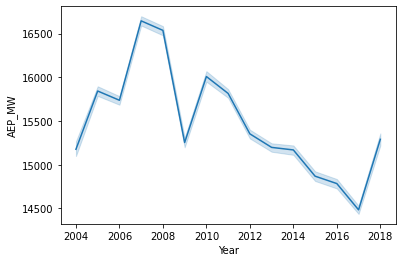

In [20]:
ax=sns.lineplot(x='Year',y='AEP_MW',data=df)
plt.show()


In [45]:
Xdf = pd.read_csv('AEP_hourly.csv', index_col='Datetime', parse_dates=['Datetime'])
df.head()

,AEP_MW
Datetime,
2004-12-31 01:00:00,13478.0
2004-12-31 02:00:00,12865.0
2004-12-31 03:00:00,12577.0
2004-12-31 04:00:00,12517.0
2004-12-31 05:00:00,12670.0


In [46]:
import pandas as pd
import datetime as dt
import seaborn as sns
from keras.layers import Dense,Dropout,SimpleRNN,LSTM
from keras.models import Sequential
import keras
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.preprocessing

In [47]:
def normalize_data(df):
    scaler = sklearn.preprocessing.MinMaxScaler()
    df['AEP_MW']=scaler.fit_transform(df['AEP_MW'].values.reshape(-1,1))
    return df

df_norm = normalize_data(df)
df_norm.shape

(121273, 1)

In [48]:
def load_data(stock, seq_len):
    X_train = []
    y_train = []
    for i in range(seq_len, len(stock)):
        X_train.append(stock.iloc[i-seq_len : i, 0])
        y_train.append(stock.iloc[i, 0])
    
    #1 last 6189 days are going to be used in test
    X_test = X_train[110000:]             
    y_test = y_train[110000:]
    
    #2 first 110000 days are going to be used in training
    X_train = X_train[:110000]           
    y_train = y_train[:110000]
    
    #3 convert to numpy array
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    
    X_test = np.array(X_test)
    y_test = np.array(y_test)
    
    #4 reshape data to input into RNN models
    X_train = np.reshape(X_train, (110000, seq_len, 1))
    
    X_test = np.reshape(X_test, (X_test.shape[0], seq_len, 1))
    
    return [X_train, y_train, X_test, y_test]


In [49]:
seq_len = 20 #choose sequence length

X_train, y_train, X_test, y_test = load_data(df, seq_len)

print('X_train.shape = ',X_train.shape)
print('y_train.shape = ', y_train.shape)
print('X_test.shape = ', X_test.shape)
print('y_test.shape = ',y_test.shape)


X_train.shape =  (110000, 20, 1)
y_train.shape =  (110000,)
X_test.shape =  (11253, 20, 1)
y_test.shape =  (11253,)


In [50]:
rnn_model = Sequential()

rnn_model.add(SimpleRNN(40,activation="tanh",return_sequences=True, input_shape=(X_train.shape[1],1)))
rnn_model.add(Dropout(0.15))

rnn_model.add(SimpleRNN(40,activation="tanh",return_sequences=True))
rnn_model.add(Dropout(0.15))

rnn_model.add(SimpleRNN(40,activation="tanh",return_sequences=False))
rnn_model.add(Dropout(0.15))

rnn_model.add(Dense(1))

rnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 20, 40)            1680      
                                                                 
 dropout_3 (Dropout)         (None, 20, 40)            0         
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 20, 40)            3240      
                                                                 
 dropout_4 (Dropout)         (None, 20, 40)            0         
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 40)                3240      
                                                                 
 dropout_5 (Dropout)         (None, 40)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                

In [80]:
rnn_model.compile(optimizer="adam",loss="MSE")
rnn = rnn_model.fit(X_train, y_train, epochs=5,validation_split=0.3, batch_size=1000)

Epoch 1/5
77/77 [==============================] - 12s 91ms/step - loss: 0.0017 - val_loss: 6.6565e-04
Epoch 2/5
77/77 [==============================] - 3s 40ms/step - loss: 0.0012 - val_loss: 6.5231e-04
Epoch 3/5
77/77 [==============================] - 3s 41ms/step - loss: 0.0012 - val_loss: 6.5350e-04
Epoch 4/5
77/77 [==============================] - 3s 40ms/step - loss: 0.0011 - val_loss: 6.6299e-04
Epoch 5/5
77/77 [==============================] - 3s 40ms/step - loss: 0.0011 - val_loss: 6.5988e-04


In [60]:
rnn_predictions = rnn_model.predict(X_test)

rnn_score = r2_score(y_test,rnn_predictions)
print("R2 Score of RNN model = ",rnn_score)

R2 Score of RNN model =  0.9733388141903426


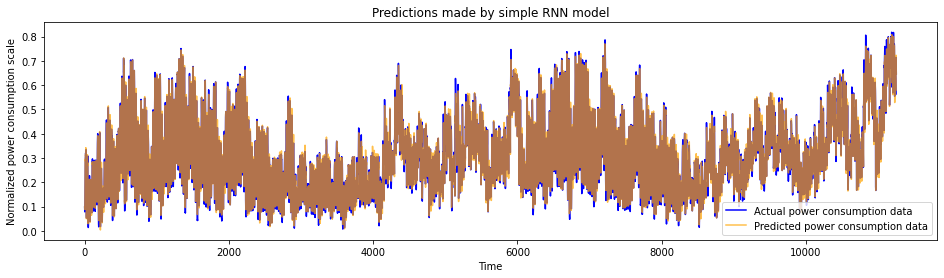

In [53]:
def plot_predictions(test, predicted, title):
    plt.figure(figsize=(16,4))
    plt.plot(test, color='blue',label='Actual power consumption data')
    plt.plot(predicted, alpha=0.7, color='orange',label='Predicted power consumption data')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Normalized power consumption scale')
    plt.legend()
    plt.show()
    
plot_predictions(y_test, rnn_predictions, "Predictions made by simple RNN model")

In [54]:
lstm_model = Sequential()

lstm_model.add(LSTM(40,activation="tanh",return_sequences=True, input_shape=(X_train.shape[1],1)))
lstm_model.add(Dropout(0.15))

lstm_model.add(LSTM(40,activation="tanh",return_sequences=True))
lstm_model.add(Dropout(0.15))

lstm_model.add(LSTM(40,activation="tanh",return_sequences=False))
lstm_model.add(Dropout(0.15))

lstm_model.add(Dense(1))

lstm_model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 20, 40)            6720      
                                                                 
 dropout_6 (Dropout)         (None, 20, 40)            0         
                                                                 
 lstm_5 (LSTM)               (None, 20, 40)            12960     
                                                                 
 dropout_7 (Dropout)         (None, 20, 40)            0         
                                                                 
 lstm_6 (LSTM)               (None, 40)                12960     
                                                                 
 dropout_8 (Dropout)         (None, 40)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                

In [78]:
lstm_model.compile(optimizer="adam",loss="MSE")
lstm=lstm_model.fit(X_train, y_train, epochs=5,validation_split=0.3, batch_size=1000)

Epoch 1/5
77/77 [==============================] - 9s 25ms/step - loss: 0.0016 - val_loss: 6.4622e-04
Epoch 2/5
77/77 [==============================] - 1s 10ms/step - loss: 0.0011 - val_loss: 6.3575e-04
Epoch 3/5
77/77 [==============================] - 1s 11ms/step - loss: 0.0011 - val_loss: 6.2859e-04
Epoch 4/5
77/77 [==============================] - 1s 11ms/step - loss: 0.0011 - val_loss: 6.5213e-04
Epoch 5/5
77/77 [==============================] - 1s 11ms/step - loss: 0.0010 - val_loss: 6.3962e-04


In [75]:
lstm_predictions = lstm_model.predict(X_test)

lstm_score = r2_score(y_test, lstm_predictions)
print("R^2 Score of LSTM model = ",lstm_score)


R^2 Score of LSTM model =  0.9736849872221633


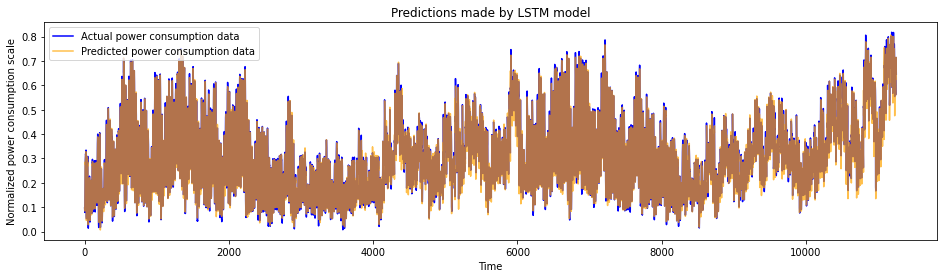

In [76]:
plot_predictions(y_test, lstm_predictions, "Predictions made by LSTM model")


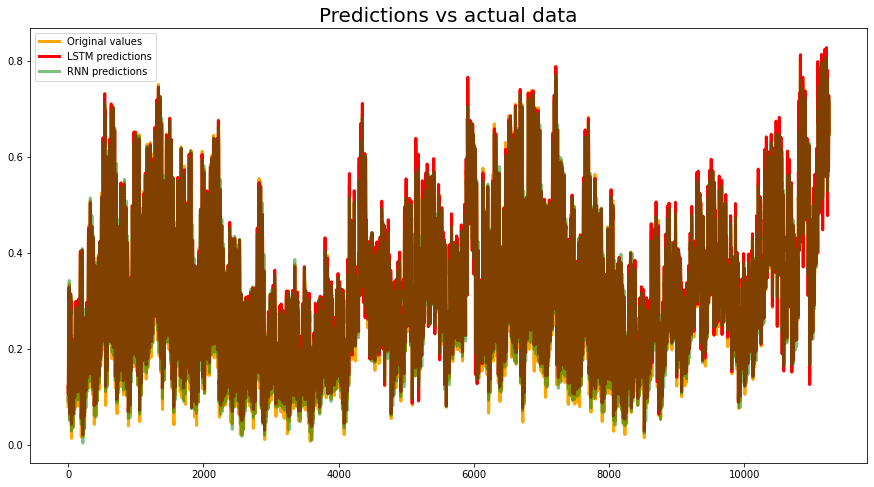

In [58]:
plt.figure(figsize=(15,8))

plt.plot(y_test, c="orange", linewidth=3, label="Original values")
plt.plot(lstm_predictions, c="red", linewidth=3, label="LSTM predictions")
plt.plot(rnn_predictions, alpha=0.5, c="green", linewidth=3, label="RNN predictions")
plt.legend()
plt.title("Predictions vs actual data", fontsize=20)
plt.show()

In [67]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print(mean_squared_error(y_test, lstm_predictions))  # MSE

print(mean_squared_error(y_test, lstm_predictions, squared=False) ) #rmse

print(mean_absolute_error(y_test, lstm_predictions)) # MAE

0.0008525551155693649
0.029198546463297875
0.02037388067533056


In [68]:
print(mean_squared_error(y_test, rnn_predictions))  # MSE

print(mean_squared_error(y_test, rnn_predictions, squared=False) ) #rmse

print(mean_absolute_error(y_test, rnn_predictions)) # MAE

0.0006261198409399586
0.025022386795426982
0.015987639892916246


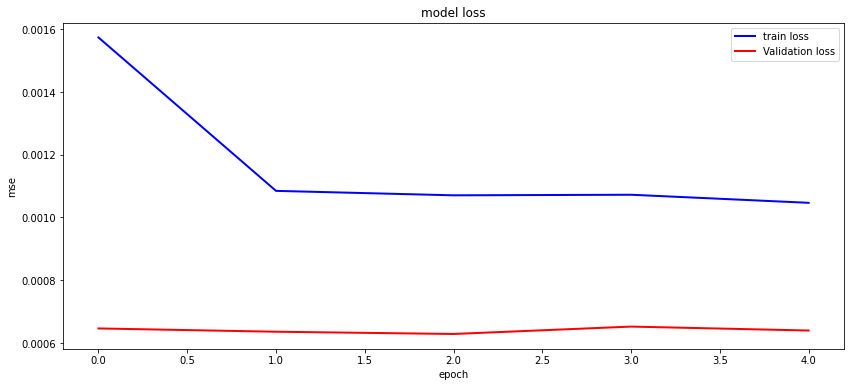

In [79]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14,6))
ax.plot(lstm.history['loss'], 'b' ,label = 'train loss', linewidth=2)
ax.plot(lstm.history['val_loss'], 'r', label ='Validation loss', linewidth=2)
ax.set_title('model loss')
ax.set_ylabel('mse')
ax.set_xlabel('epoch')
ax.legend()
plt.show()

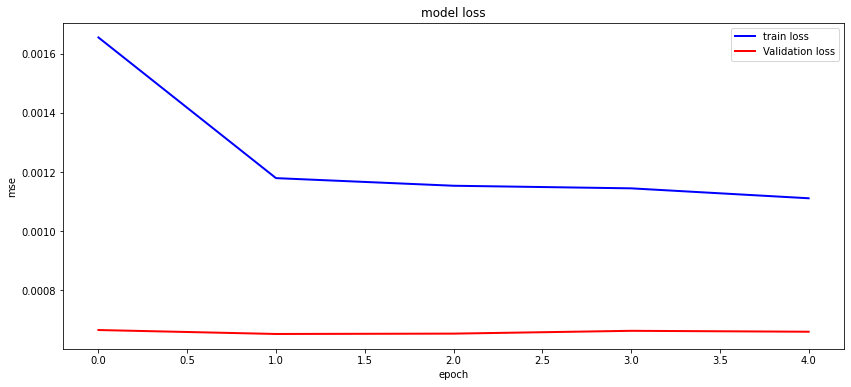

In [81]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14,6))
ax.plot(rnn.history['loss'], 'b' ,label = 'train loss', linewidth=2)
ax.plot(rnn.history['val_loss'], 'r', label ='Validation loss', linewidth=2)
ax.set_title('model loss')
ax.set_ylabel('mse')
ax.set_xlabel('epoch')
ax.legend()
plt.show()